In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import ceil
import matplotlib.pyplot as plt

In [2]:
#1. initialize the example data

# Generate features
x = np.arange(0, 20, 1)


n = 10
x_list = []

for i in range(1, n):
    x_list.append(x**i)
    
# Create the feature matrix X
X = np.stack(x_list, axis=1)

# Generate a target vector y
y = np.cos(x/2)

# Print the shapes to confirm
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (20, 9)
Shape of y: (20,)


In [3]:
#2. initialize weight vector and b
w_i = np.zeros(X.shape[1])
b_i = 0.0 
print(w_i)

[0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [4]:
#3. normalize the dataset
a = np.mean(X, axis = 0)
s = np.std(X, axis = 0)
X_norm = (X - a) / s

In [5]:
#4. compute the cost
def compute_cost(x, y, w, b):
    y_pre = np.dot(x, w) + b
    #print(y_pre)
    #print(y_pre.shape)
    m = y_pre.shape[0]
    cost = np.sum((y_pre - y)**2) / (2 * m)
    return cost

In [6]:
#5. compute the gradient
def compute_gradient(x, y, w, b):
    y_pre = np.dot(x, w) + b
    errors = y_pre - y
    m = y_pre.shape[0]
    dj_dw = (x.T @ errors) / m
    dj_db = np.sum(errors) / m
    return dj_dw, dj_db
    

In [7]:
#6. excute gradient descent
def gradient_descent(x, y, w, b, compute_cost, compute_gradient):
    w_e = w.copy()
    b_e = b
    listcost = []
    iteration = int(1e6)
    alpha = 0.1
    prev = None
    tol = 1e-9
    for num in range(iteration):
        currentcost = compute_cost(x, y, w_e, b_e)
        listcost.append(currentcost)
        if num % ceil(iteration / 10) == 0:
            print(f"At step {num} current cost is: {listcost[-1]}")
        if prev is not None and abs(prev - currentcost) <= tol:
            break

        prev = currentcost
        gradient_w, gradient_b = compute_gradient(x, y, w_e, b_e)
        w_e = w_e - alpha * gradient_w
        b_e = b_e - alpha * gradient_b

    return listcost, w_e, b_e
        

In [8]:
#7. run the train process
cost_history, w_final, b_final = gradient_descent(X_norm, y, w_i, b_i, compute_cost, compute_gradient)
print(f"final w and b are: {w_final}, {b_final}")

At step 0 current cost is: 0.26414408131399514
At step 100000 current cost is: 0.016879316373270097
At step 200000 current cost is: 0.015196822488298891
At step 300000 current cost is: 0.014362618084083767
At step 400000 current cost is: 0.013721657894043107
At step 500000 current cost is: 0.01314004335918344
At step 600000 current cost is: 0.012589729627537885
At step 700000 current cost is: 0.012064201340398154
At step 800000 current cost is: 0.011561349580777355
At step 900000 current cost is: 0.011079993654055832
final w and b are: [ -2.16815677  -5.59150227  21.67310969  -0.92160077 -14.12828254
  -9.60092139   1.5838704    7.64390666   1.16033915], -0.0072871948558386876


In [9]:
#8. convert w and b to true space
w_final_ori = w_final / s
b_final_ori = b_final - (w_final_ori @ a)
print(f"final w and b in the true space are: {w_final_ori}, {b_final_ori}")
finalprediction = X @ w_final_ori + b_final_ori
finalerrors = finalprediction - y

final w and b in the true space are: [-3.76006071e-01 -4.92666318e-02  1.03738693e-02 -2.41562032e-05
 -2.02321316e-05 -7.47967507e-07  6.68414420e-09  1.74071616e-09
  1.42114189e-11], 1.2060507492849748


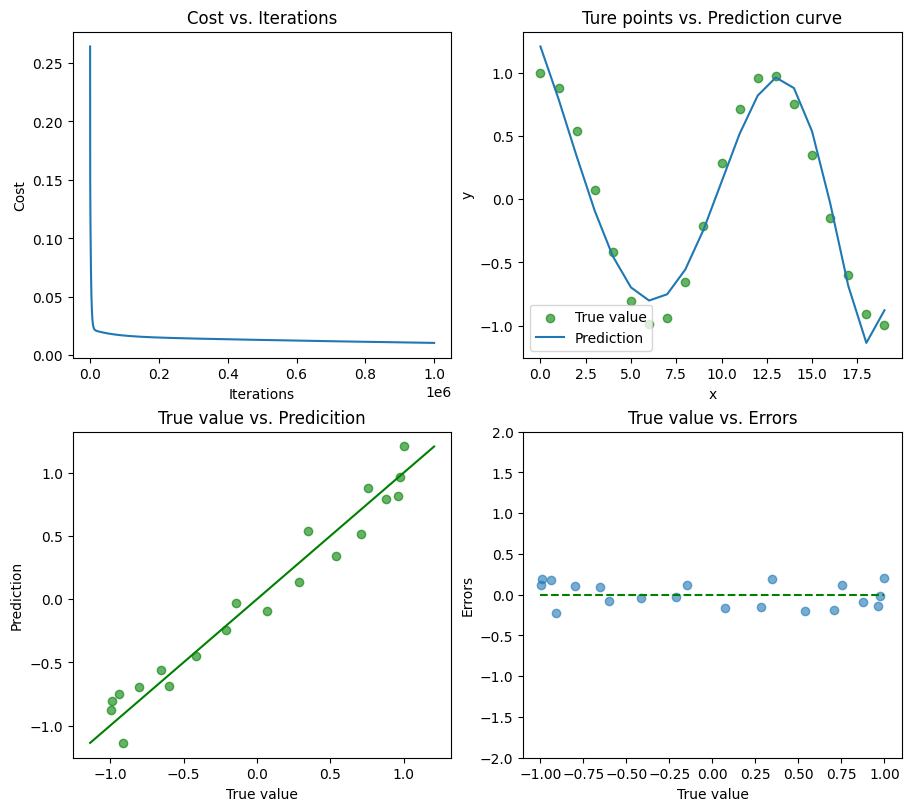

In [10]:
#9. plot the cost curve to monitor the training
fig, ax = plt.subplots(2, 2, constrained_layout = True, figsize = (9, 8))
ax[0, 0].plot(cost_history)
ax[0, 0].set_title("Cost vs. Iterations")
ax[0, 0].set_xlabel("Iterations")
ax[0, 0].set_ylabel("Cost")

ax[0, 1].scatter(x, y, alpha = 0.6, c = "g", label = "True value")
ax[0, 1].plot(x, finalprediction, label = "Prediction")
ax[0, 1].set_title("Ture points vs. Prediction curve")
ax[0, 1].set_xlabel("x")
ax[0, 1].set_ylabel("y")
ax[0, 1].legend(loc = "best")

ax[1, 0].scatter(y, finalprediction, alpha = 0.6, c = "g")
ax[1, 0].set_title("True value vs. Predicition")
ax[1, 0].set_xlabel("True value")
ax[1, 0].set_ylabel("Prediction")
min_val = min(y.min(), finalprediction.min())
max_val = max(y.max(), finalprediction.max())
ax[1, 0].plot([min_val, max_val], [min_val, max_val], 'g-')


ax[1, 1].scatter(y, finalerrors, alpha = 0.6)
ax[1, 1].set_title("True value vs. Errors")
ax[1, 1].set_xlabel("True value")
ax[1, 1].set_ylabel("Errors")
ax[1, 1].set_ylim(-2, 2)
ax[1, 1].plot([-y.max(), y.max()], [0, 0], 'g--')


plt.show()



In [11]:
#10. evaluate MSE and R squre
mse = mean_squared_error(y, finalprediction)
print(f"Test MSE: {mse}")
r2 = r2_score(y, finalprediction)
print(f"Test R-squared: {r2}")

Test MSE: 0.021238346856235667
Test R-squared: 0.9597937575752913
